In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
ds=pd.read_csv('/content/drive/MyDrive/sentimentdataset.csv')

In [14]:
ds.head(10)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
5,5,5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9
6,6,6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14
7,7,7,The new movie release is a must-watch! ...,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16,19
8,8,8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17,8
9,9,9,Missing summer vibes and beach days. ...,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17,12


In [ ]:
# prompt: Using dataframe ds: which users have the highest average engagement (likes and retweets per post)?

# Calculate the total engagement (likes + retweets) for each post.
ds['TotalEngagement'] = ds['Likes'] + ds['Retweets']

# Group by user and calculate the average engagement per user.
average_engagement_per_user = ds.groupby('User')['TotalEngagement'].mean()

# Find the users with the highest average engagement.
highest_engagement_users = average_engagement_per_user.sort_values(ascending=False)

# Display the result.
highest_engagement_users


In [5]:
ds.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0


#questions

In [13]:
# What is the overall distribution of sentiments (positive, negative, neutral) across the posts?

sentiment_counts = ds['Sentiment'].value_counts()

sentiment_counts

,count
Sentiment,
Positive,44
Joy,42
Excitement,32
Neutral,14
Contentment,14
...,...
Adrenaline,1
Harmony,1
ArtisticBurst,1


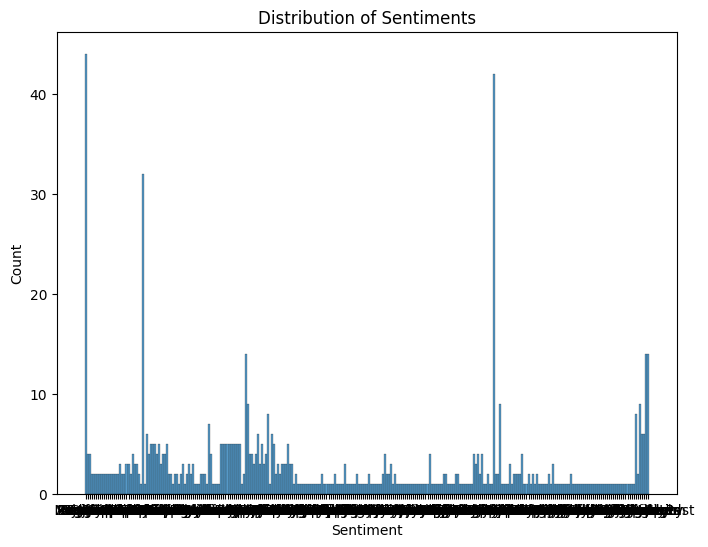

In [24]:
#for visual representation

plt.figure(figsize=(8, 6))
sns.histplot(data=ds, x='Sentiment')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [19]:
#Which platform generates the most engagement in terms of likes and retweets?

grouped = ds.groupby('Platform')
likes = grouped['Likes'].sum()
retweets = grouped['Retweets'].sum()


total_engagement = likes + retweets

most_engaged_platform = total_engagement.idxmax()


print("The platform with the most engagement is:" ,most_engaged_platform)


The platform with the most engagement is:  Instagram 


<ipython-input-26-b48dced0e740>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=likes.index, y=likes.values, palette='viridis')


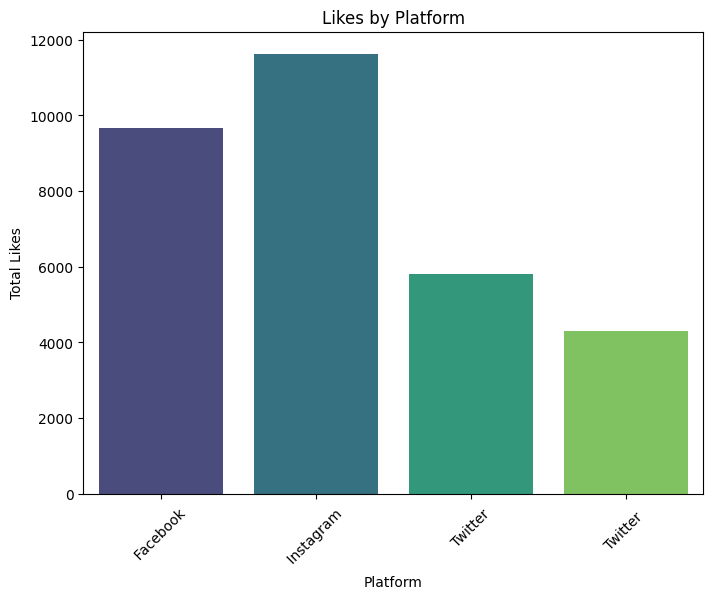

In [26]:
# for visual representation

plt.figure(figsize=(8, 6))
sns.barplot(x=likes.index, y=likes.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Likes by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Likes')
plt.show()

In [35]:
#which users have the highest average engagement (likes and retweets per post)?

ds['TotalEngagement'] = ds['Likes'] + ds['Retweets']

average_engagement_per_user = ds.groupby('User')['TotalEngagement'].mean()

highest_engagement_users = average_engagement_per_user.sort_values(ascending=False)

highest_engagement_users


,TotalEngagement
User,
DanceEnthusiastCityNightPerformance,120.0
Wanderlust,120.0
BieberDanceEnthusiast,120.0
SolitaryDescent,120.0
SoccerFanTeamDefeats,120.0
...,...
ApatheticObserver,22.0
MundaneHeart,22.0
StagnantHeart,22.0


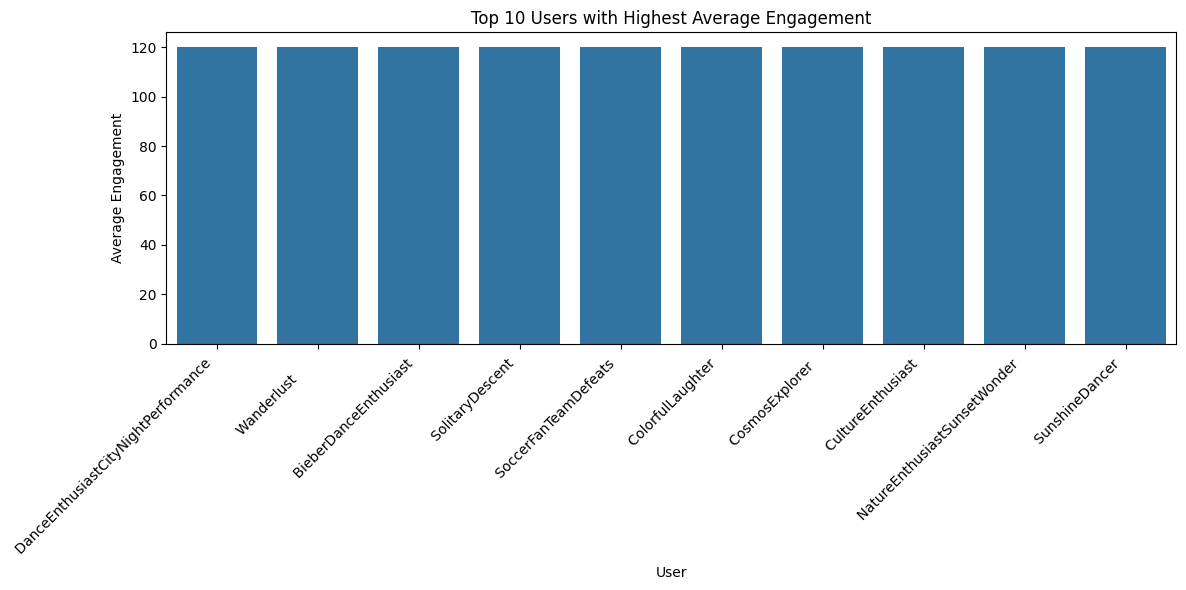

In [38]:
# for visual representation
plt.figure(figsize=(12, 6))
sns.barplot(x=top_users.index, y=top_users.values)
plt.title('Top 10 Users with Highest Average Engagement')
plt.xlabel('User')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
